In [1]:
# 매매로그를 이용하여 VaR과 ES를 구해본다.
# 작성자의 포트폴리오 일일수익률을 기준으로 작성하여 포트폴리오 별로 출력값은 달리 나올수 있음.

'''
참고 문헌 및 글

- Value At Risk -
https://datascienceschool.net/view-notebook/dd6a7633d69f401bb00409b9ae8806e8/
https://m.blog.naver.com/PostView.nhn?blogId=chansoookim&logNo=220781170848&proxyReferer=https%3A%2F%2Fwww.google.com%2F

- Expected ShortFall -
https://quantdare.com/value-at-risk-or-expected-shortfall/
https://s3.amazonaws.com/assets.datacamp.com/production/course_5612/slides/chapter4.pdf
'''

## 패키지 호출
## Data manipulation
import numpy as np
import pandas as pd

## Graph
import matplotlib
import matplotlib.pyplot as plt

## Tabular data
from tabulate import tabulate

In [2]:
## 수익률 파일 호출
## 총자산 및 남은 현금 Columns는 필요성이 느껴지지 않아 Drop하였음.

## 데이터 호출 및 불필요 데이터 삭제
daily_profit = pd.read_csv('Test_CSV/913695/trade_history_daily_913695.csv')
daily_profit = daily_profit.drop(["총자산", "남은 현금"], axis=1)

## 2017년 데이터 추출
daily_2017 = daily_profit[0:243]

## 2018년 Data
daily_2018 = daily_profit[244:487]

## 2019년 Data
daily_2019 = daily_profit[487:733]

## 2017~2019년 Data
daily_Tot = daily_profit[:733]

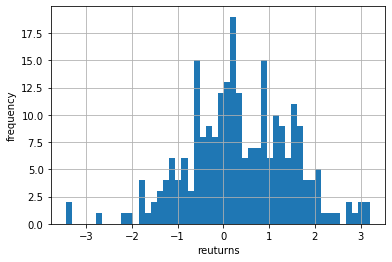

In [3]:
## 2017년의 데이터를 이용해 Histogram Graph 작도
plt.hist(daily_2017["일일수익률"][0:243], bins = 50)
plt.xlabel("reuturns")
plt.ylabel("frequency")
plt.grid(True)

plt.show()

In [4]:
## 2017년 데이터를 이용해 VAR을 구해보자.

'''
VaR(Value At Risk)
특정 금융자산 포트폴리오의 손실위험을 측정하기 위해
널리 이용되는 위험 측정수단으로서 
특정 포트폴리오가 일정기간 동안 보여준 변동률을 고려할 때 
향후 발생할 수도 있는 최대손실 가능금액 (Worst Expected Loss)과 확률을 나타낸다.

이 노트북에서는 과거 데이터를 이용하여 VaR을 산출하였다.(역사적 시뮬레이션)
'''

## 데이터 정렬
daily_2017.sort_values('일일수익률', inplace = True, ascending = True)

## 상위값 확인
VaR_1_2017 = daily_2017["일일수익률"].quantile(0.99)
VaR_5_2017 = daily_2017["일일수익률"].quantile(0.95)
VaR_10_2017 = daily_2017["일일수익률"].quantile(0.9)
VaR_50_2017 = daily_2017["일일수익률"].quantile(0.5)

## 하위값 확인 
VaR_90_2017 = daily_2017["일일수익률"].quantile(0.1)
VaR_95_2017 = daily_2017["일일수익률"].quantile(0.05)
VaR_99_2017 = daily_2017["일일수익률"].quantile(0.01)

## 테이블로 출력
## VaR%만큼의 수익 or 손실이 발생할 확률은 X%이다.
print(tabulate([["1%", VaR_1_2017], ["5%", VaR_5_2017], ["10%", VaR_10_2017], ["50%", VaR_50_2017]], headers = ["수익확률_2017", "VaR"]))
print("\n")
print(tabulate([["10%", VaR_90_2017], ["5%", VaR_95_2017], ["1%", VaR_99_2017]], headers = ["손실확률_2017", "VaR"]))

수익확률_2017       VaR
---------------  ------
1%               3.0132
5%               2.03
10%              1.73
50%              0.27


손실확률_2017        VaR
---------------  -------
10%              -1.062
5%               -1.448
1%               -2.5174


C:\Users\82104\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
## 2018년

## 데이터 정렬
daily_2018.sort_values('일일수익률', inplace = True, ascending = True)

## 상위값 확인
VaR_1_2018 = daily_2018["일일수익률"].quantile(0.99)
VaR_5_2018 = daily_2018["일일수익률"].quantile(0.95)
VaR_10_2018 = daily_2018["일일수익률"].quantile(0.9)
VaR_50_2018 = daily_2018["일일수익률"].quantile(0.5)

## 하위값 확인 
VaR_90_2018 = daily_2018["일일수익률"].quantile(0.1)
VaR_95_2018 = daily_2018["일일수익률"].quantile(0.05)
VaR_99_2018 = daily_2018["일일수익률"].quantile(0.01)

## 테이블로 출력
print(tabulate([["1%", VaR_1_2018], ["5%", VaR_5_2018], ["10%", VaR_10_2018], ["50%", VaR_50_2018]], headers = ["백분위 비율_2018", "VaR"]))
print("\n")
print(tabulate([["90%", VaR_90_2018], ["95%", VaR_95_2018], ["99%", VaR_99_2018]], headers = ["백분위 비율_2018", "VaR"]))

백분위 비율_2018       VaR
------------------  ------
1%                  3.7058
5%                  2.098
10%                 1.694
50%                 0.13


백분위 비율_2018        VaR
------------------  -------
90%                 -1.11
95%                 -1.706
99%                 -3.0088


C:\Users\82104\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [6]:
## 2019년

## 데이터 정렬
daily_2019.sort_values('일일수익률', inplace = True, ascending = True)

## 상위값 확인
VaR_1_2019 = daily_2019["일일수익률"].quantile(0.99)
VaR_5_2019 = daily_2019["일일수익률"].quantile(0.95)
VaR_10_2019 = daily_2019["일일수익률"].quantile(0.9)
VaR_50_2019 = daily_2019["일일수익률"].quantile(0.5)

## 하위값 확인 
VaR_90_2019 = daily_2019["일일수익률"].quantile(0.1)
VaR_95_2019 = daily_2019["일일수익률"].quantile(0.05)
VaR_99_2019 = daily_2019["일일수익률"].quantile(0.01)

## 테이블로 출력
print(tabulate([["1%", VaR_1_2019], ["5%", VaR_5_2019], ["10%", VaR_10_2019], ["50%", VaR_50_2019]], headers = ["백분위 비율_2019", "VaR"]))
print("\n")
print(tabulate([["90%", VaR_90_2019], ["95%", VaR_95_2019], ["99%", VaR_99_2019]], headers = ["백분위 비율_2019", "VaR"]))

백분위 비율_2019       VaR
------------------  ------
1%                  3.431
5%                  2.5275
10%                 1.88
50%                 0.275


백분위 비율_2019        VaR
------------------  -------
90%                 -1.35
95%                 -1.8275
99%                 -2.991


C:\Users\82104\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [7]:
## 연도별 표준편차 확인
std_2017 = round(daily_2017["일일수익률"].std(), 5)
std_2018 = round(daily_2018["일일수익률"].std(), 5)
std_2019 = round(daily_2019["일일수익률"].std(), 5)

print(std_2017, std_2018, std_2019)

1.13531 1.21386 1.31588


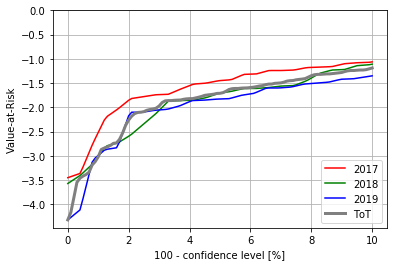

In [8]:
## VaR 분포를 그래프를 이용하여 시각적으로 확인해본다.
percs = list(np.arange(0.0, 10.1, 0.1))

var_2017 = np.percentile(daily_2017["일일수익률"], percs)
var_2018 = np.percentile(daily_2018["일일수익률"], percs)
var_2019 = np.percentile(daily_2019["일일수익률"], percs)
var_Tot = np.percentile(daily_Tot["일일수익률"], percs)

plt.plot(percs, var_2017, 'r', lw=1.5, label='2017')
plt.plot(percs, var_2018, 'g', lw=1.5, label='2018')
plt.plot(percs, var_2019, 'b', lw=1.5, label='2019')
plt.plot(percs, var_Tot, 'Gray', lw=3, label='ToT')

plt.legend(loc=4)
plt.xlabel('100 - confidence level [%]')
plt.ylabel('Value-at-Risk')
plt.grid(True)
plt.ylim(ymax=0.0)

plt.show()

## 그래프를 확인 결과 극값에서의 손실이 제일 큼을 확인할 수 있다.(Black Swan)
## 2%대에서 급격히 손실이 커진다.
## 연도가 지나갈수록 VaR값이 커진다.
## 3년합은 중간값정도에 해당되나 극값에서 급격히 커짐. 2019년의 VaR값들에 의해 영향을 받은것으로 추정됨.

In [9]:
## 연도별 Expected_ShortFall을 구해보자. (ES : VaR 에 들어가있는 손실값의 평균)

## 1%의 확률로 일어날 수 있는 포트폴리오 손실값 전체의 평균 (VaR 1%)
print(round(daily_2017["일일수익률"][daily_2017["일일수익률"] <= VaR_99_2017].mean(),3))
print(round(daily_2018["일일수익률"][daily_2018["일일수익률"] <= VaR_99_2018].mean(),3))
print(round(daily_2019["일일수익률"][daily_2019["일일수익률"] <= VaR_99_2019].mean(),3))

## 5%의 확률로 일어날 수 있는 포트폴리오 손실값 전체의 평균 (VaR 5%)
print(round(daily_2017["일일수익률"][daily_2017["일일수익률"] <= VaR_95_2017].mean(),3))
print(round(daily_2018["일일수익률"][daily_2018["일일수익률"] <= VaR_95_2018].mean(),3))
print(round(daily_2019["일일수익률"][daily_2019["일일수익률"] <= VaR_95_2019].mean(),3))

## 10%의 확률로 일어날 수 있는 포트폴리오 손실값 전체의 평균 (VaR 10%)
print(round(daily_2017["일일수익률"][daily_2017["일일수익률"] <= VaR_90_2017].mean(),3))
print(round(daily_2018["일일수익률"][daily_2018["일일수익률"] <= VaR_90_2018].mean(),3))
print(round(daily_2019["일일수익률"][daily_2019["일일수익률"] <= VaR_90_2019].mean(),3))

-3.183
-3.377
-3.84


-2.073
-2.446
-2.541


-1.659
-1.954
-2.072


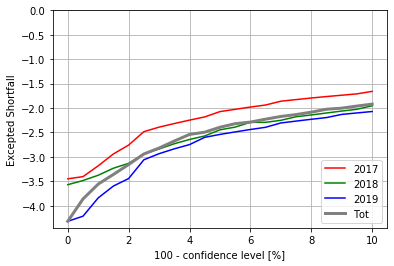

In [10]:
## ES 분포를 그래프를 이용하여 시각적으로 확인해본다.

## ES 구하는 함수
def get_ES(percent_list, profit_df):
    temp = []
    
    for i in percent_list:
        var_temp =  np.percentile(profit_df["일일수익률"], i)
        es_temp = profit_df["일일수익률"][profit_df["일일수익률"] <= var_temp].mean()
        temp.append(es_temp)
        
    return  temp


## ES 산출용 list 산출 
percs = list(np.arange(0.0, 10.1, 0.5))
    
## ES값 산출    
es_2017 = get_ES(percs, daily_2017)
es_2018 = get_ES(percs, daily_2018)
es_2019 = get_ES(percs, daily_2019)
es_Tot = get_ES(percs, daily_Tot)

## 그래프 작도
plt.plot(percs, es_2017, 'r', lw=1.5, label='2017')
plt.plot(percs, es_2018, 'g', lw=1.5, label='2018')
plt.plot(percs, es_2019, 'b', lw=1.5, label='2019')
plt.plot(percs, es_Tot, 'Gray', lw=3, label='Tot')

plt.legend(loc=4)
plt.xlabel('100 - confidence level [%]')
plt.ylabel('Excepted Shortfall')
plt.grid(True)
plt.ylim(ymax=0.0)

plt.show()

## 그래프를 확인해보니 4%대부터 손실이 커진다.
## 연도가 지나갈수록 ES값도 VaR에 비례하여 커진다.
## 3년합은 중간값정도에 해당되나 2%대에서 급격히 커짐. 2019년의 VaR값들에 의해 영향을 받은것으로 추정됨.

In [11]:
## 2020.02.22.
## 이 값들을 이용해 포트폴리오의 위험성을 어떻게 평가할 것인가? (★★)
## 여러 포트폴리오의 값을 이 리스크 지표들을 이용하여 조합을 어떻게 짤 수 있을까? (★★)
## 극값에 해당되는 손실값을 줄일 수 있는 방법은 없을까? (★★★)